In [75]:
import pandas as pd #for reading the dataset
import numpy as np #for plotting
import seaborn as sns #for plotting
import matplotlib.pyplot as plt #for plotting
%matplotlib inline

In [76]:
df = pd.read_csv("https://raw.githubusercontent.com/Jegadit/Customer-Churn-Prediction-Analysis-Using-Ensemble-Techniques/main/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Exploratory Data Analysis

In [77]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:
df.shape

(7043, 21)

In [79]:
df.duplicated().sum()

0

In [80]:
df = df.drop_duplicates(subset= None, keep= 'first', inplace= False, ignore_index= False)
df.duplicated().sum()

0

In [81]:
df.shape

(7043, 21)

In [82]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# FEATURE ENGINEERING

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [84]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
df['gender'] = df['gender'].map({'Male':1, 'Female':0})

### ENCODING & DROPPING

In [85]:
from sklearn.preprocessing import LabelEncoder

cols = df.columns.to_list()

label_encoder = LabelEncoder()
test = df['Churn']
df = df.drop(['Churn'], axis = 1)


for i in range(len(cols)-3):
    df[cols[i]] = label_encoder.fit_transform(df[cols[i]])

df['Churn'] = label_encoder.fit_transform(test)

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.5,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.9,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.6,1


In [86]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [87]:
droplist = ['customerID','MultipleLines', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

df1 = df.drop(columns=droplist)
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,Contract,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,2,0,29.85,29.85,0
1,1,0,0,0,34,1,0,2,0,1,56.95,1889.5,0
2,1,0,0,0,2,1,0,2,2,0,53.85,108.15,1
3,1,0,0,0,45,0,0,2,0,1,42.30,1840.75,0
4,0,0,0,0,2,1,1,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,0,2,0,1,84.80,1990.5,0
7039,0,0,1,1,72,1,1,0,2,1,103.20,7362.9,0
7040,0,0,1,1,11,0,0,2,0,0,29.60,346.45,0
7041,1,1,1,0,4,1,1,0,0,0,74.40,306.6,1


# DATA VISUALIZATION

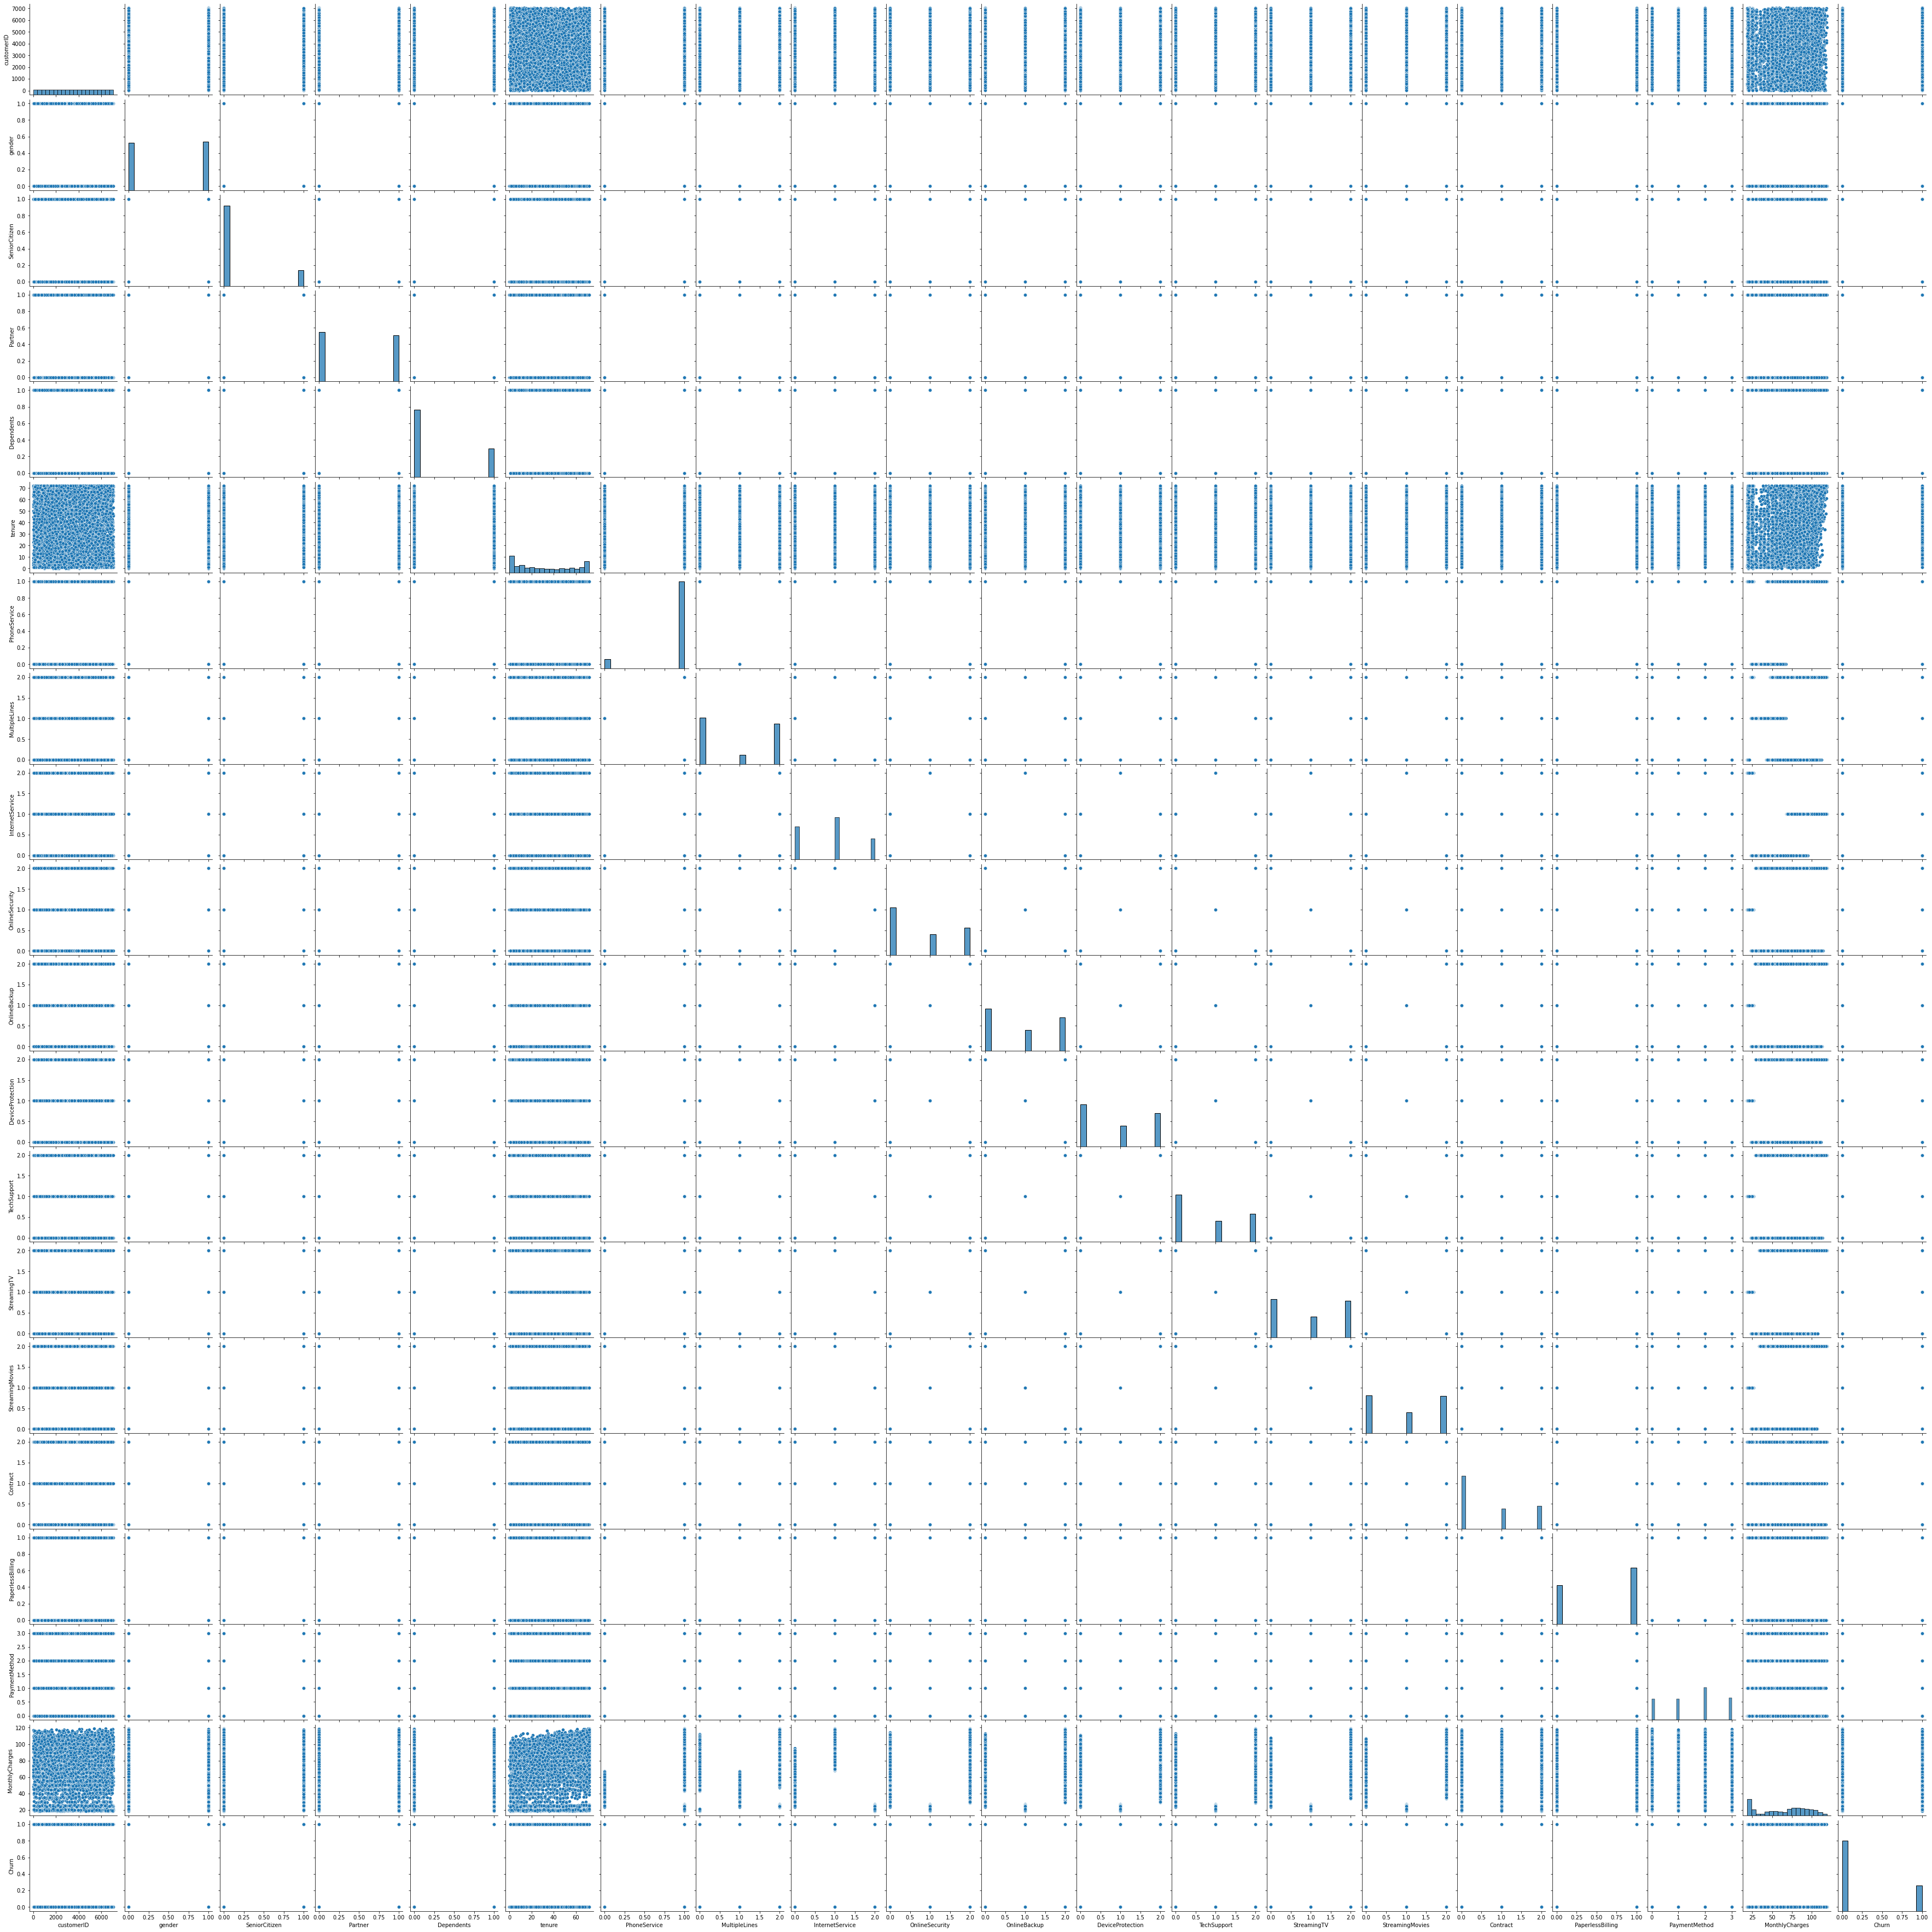

In [88]:
sns.pairplot(df)

In [89]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<AxesSubplot:>

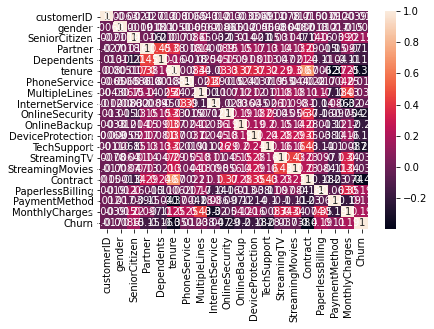

In [91]:
corr=df.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

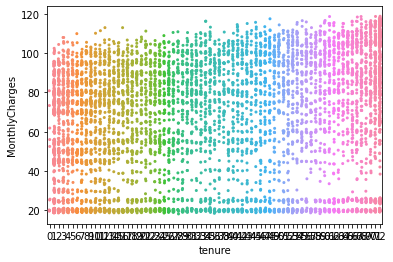

In [92]:
sns.stripplot(x="tenure", y="MonthlyCharges", data=df, size=3, dodge=True)